In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib._color_data as mcd
import random

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/housing.csv')
dataset = dataset.dropna()
dataset.head(10)
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/data.csv')

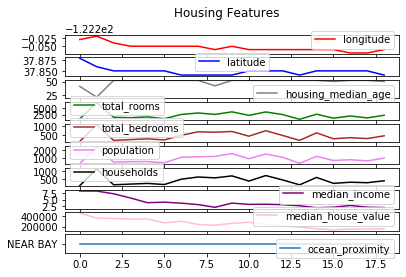

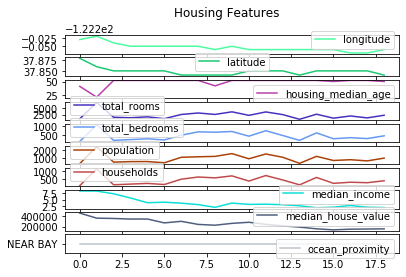

In [195]:
axSubPlt = []

fig, subPlotObj = plt.subplots(10)
fig.suptitle('Housing Features')
for i in range(10):
  axSubPlt.append(subPlotObj[i])

name_list = []

for i in dataset:
  name_list.append(str(i))
  
def random_color():
    rgba=(random.random(),random.random(),random.random())
    return rgba

numbers = [i for i in range(19)]

for i in range(10):
  axSubPlt[i].plot(numbers, dataset.iloc[:,i][0:19], color = random_color())
  axSubPlt[i].legend([name_list[i]])

plt.savefig('books_read.png')


In [0]:
Y = dataset['median_house_value']

X = dataset.loc[:,'longitude':'median_income']

In [185]:
X.shape

(20433, 8)

In [186]:
Y.shape

(20433,)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state = 2003)

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()


# print("There are " + str(x_train.size) + " training entries and "+  str(x_test.size) + " testing entries ")


In [0]:
import torch

from torch.nn import Conv1d

from torch.nn import MaxPool1d

from torch.nn import Flatten

from torch.nn import Linear

from torch.nn.functional import relu

from torch.utils.data import DataLoader, TensorDataset

import time

In [0]:
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)

    self.max_pooling_layer = MaxPool1d(1)

    self.max_pooling_layer1 = MaxPool1d(1)

    self.conv_layer = Conv1d(batch_size, 64, 1)

    # self.conv_layer1 = Conv1d(512, 256, 1)

    self.flatten_layer = Flatten()

    self.linear_layer = Linear(64, 32)

    self.output_layer = Linear(32, outputs)

  def feed(self, input):
    input = input.reshape((self.batch_size, self.inputs,1))
    output = relu(self.input_layer(input))

    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))

    output = self.max_pooling_layer1(output)

    # output = relu(self.conv_layer1(output))

    output = self.flatten_layer(output)

    output = self.linear_layer(output)

    output = self.output_layer(output)
    return output


In [190]:
from torch.optim import SGD, Adam

from torch.nn import L1Loss

!pip install pytorch-ignite

from ignite.contrib.metrics.regression.r2_score import R2Score

In [191]:
batch_size = 64
# print(X.shape[1])
model = CnnRegressor(batch_size, X.shape[1], 1)

model.cuda()

torch.save(model, '/content/drive/My Drive/Colab Notebooks/1106924_1dconv_reg.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CnnRegressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
torch.load('/content/drive/My Drive/Colab Notebooks/1106924_1dconv_reg.pt')
def model_loss(model, dataset, train = False, optimizer = None):
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataset):
    predections = model.feed(input)

    loss = performance(predections, output)

    score_metric.update([predections, output])
    score = score_metric.compute()

    if(train):
      optimizer.zero_grad()

      loss.backward()

      optimizer.step()
    
    avg_loss += loss.item()

    avg_score += score
    count += 1

  return avg_loss / count, avg_score / count


Epoch 1:
	Loss = 43360.700567544845
	R^2 Score = 0.7067205654186227
Epoch 2:
	Loss = 43251.6672067685
	R^2 Score = 0.7036801576132901
Epoch 3:
	Loss = 43126.809250630606
	R^2 Score = 0.7003452727944607
Epoch 4:
	Loss = 43020.07957889574
	R^2 Score = 0.7121237820233368
Epoch 5:
	Loss = 42922.28313305773
	R^2 Score = 0.7102559059396406
Epoch 6:
	Loss = 43571.24519163397
	R^2 Score = 0.7075032579713106
Epoch 7:
	Loss = 42972.23892061379
	R^2 Score = 0.7162692328166385
Epoch 8:
	Loss = 43042.82717909193
	R^2 Score = 0.7109394066933008
Epoch 9:
	Loss = 42911.132155619394
	R^2 Score = 0.7137982323225266
Epoch 10:
	Loss = 43055.8741329176
	R^2 Score = 0.7039037080451979
Epoch 11:
	Loss = 43181.09502872758
	R^2 Score = 0.7067485585380762
Epoch 12:
	Loss = 43100.89806088845
	R^2 Score = 0.7189686448069356
Epoch 13:
	Loss = 43303.191152256164
	R^2 Score = 0.704834765239722
Epoch 14:
	Loss = 43041.74626015975
	R^2 Score = 0.709632155262743
Epoch 15:
	Loss = 43016.357912345855
	R^2 Score = 0.71111

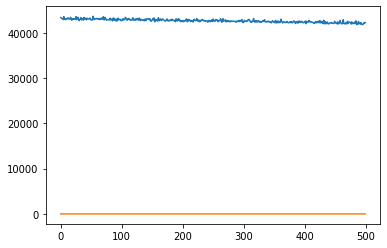

Time taken to train this model with 500 epochs is: 400.2984621524811sec


In [208]:
epochs = 500

# optimizer = SGD(model.parameters())

optimizer = Adam(model.parameters())  

# optimizer = Adam(model.parameters(), lr=0.0001)

inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()

tensor = TensorDataset(inputs, outputs)

loader = DataLoader(tensor,batch_size, shuffle=True, drop_last=True)

start_time = time.time()

list_loss = []

list_r2 = []

for epoch in range(epochs):
  avg_loss, avg_r2_score = model_loss(model, loader, train=True, optimizer=optimizer)
  list_r2.append(avg_r2_score)
  list_loss.append( avg_loss)
  print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))

end_time = time.time()
plt.plot(list_loss)
plt.plot(list_r2)
plt.show()

# plt1.show()
print("Time taken to train this model with "+str(epochs)+ " epochs is: "+ str(end_time-start_time) + "sec")

In [251]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()

tensor = TensorDataset(inputs, outputs)

loader = DataLoader(tensor,batch_size, shuffle=True, drop_last=True)

avg_loss, avg_r2_score = model_loss(model, loader)

print("Loss = " + str(avg_loss) + "\nR^2 Score = " + str(avg_r2_score))

Loss = 45795.57345805921
R^2 Score = 0.6833783624381297
